In [2]:
import QuantLib as ql
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import CubicHermiteSpline, CubicSpline, KroghInterpolator

%matplotlib inline

# 1-D interpolation

In [3]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0) + 1

In [4]:
xnew = np.linspace(0, 10, num=1001)
ynew = np.interp(xnew, x, y)

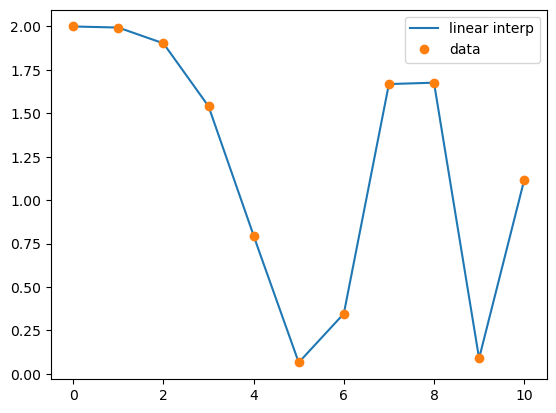

In [5]:
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

# Cubic Spline


In [9]:
from scipy.interpolate import CubicSpline
spl = CubicSpline(x, y)

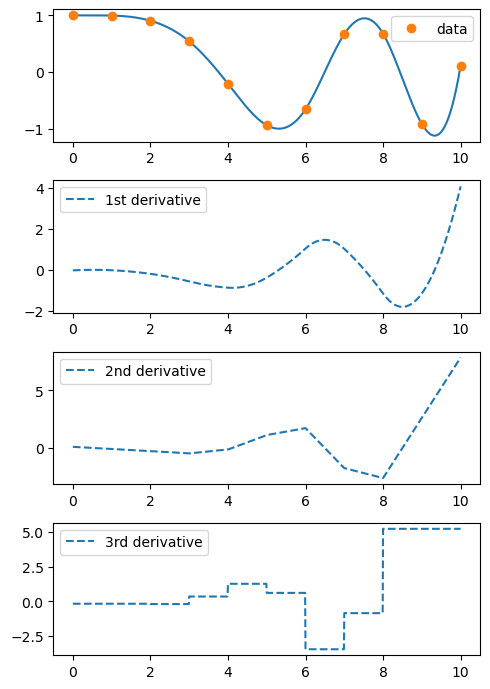

In [19]:
fig, ax = plt.subplots(4, 1, figsize=(5, 7))
xnew = np.linspace(0, 10, num=1001)
ax[0].plot(xnew, spl(xnew))
ax[0].plot(x, y, 'o', label='data')
ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')
ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')
ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')
for j in range(4):
    ax[j].legend(loc='best')
plt.tight_layout()
plt.show()

### QuantLib 1-D Interpolator 

- LinearInterpolation
- LogLinearInterpolation
- BackwardFlatInterpolation
- ForwardFlatInterpolation

- CubicNaturalSpline
- LogCubicNaturalSpline
- MonotonicCubicNaturalSpline
- MonotonicLogCubicNaturalSpline
- KrugerCubic
- KrugerLogCubic

- FritschButlandCubic
- FritschButlandLogCubic

- Parabolic
- LogParabolic
- MonotonicParabolic
- MonotonicLogParabolic

- LagrangeInterpolation

In [ ]:
ql.LinearInterpolation()
ql.LogLinearInterpolation()
ql.BackwardFlatInterpolation()
ql.ForwardFlatInterpolation()
ql.CubicNaturalSpline()
ql.LogCubicNaturalSpline()
ql.MonotonicCubicNaturalSpline()
ql.KrugerCubic()
ql.FritschButlandCubic()
ql.Parabolic()
ql.LagrangeInterpolation()
# ql.ChebyshevInterpolation() see signature
# ql.ConvexMonotoneInterpolation()

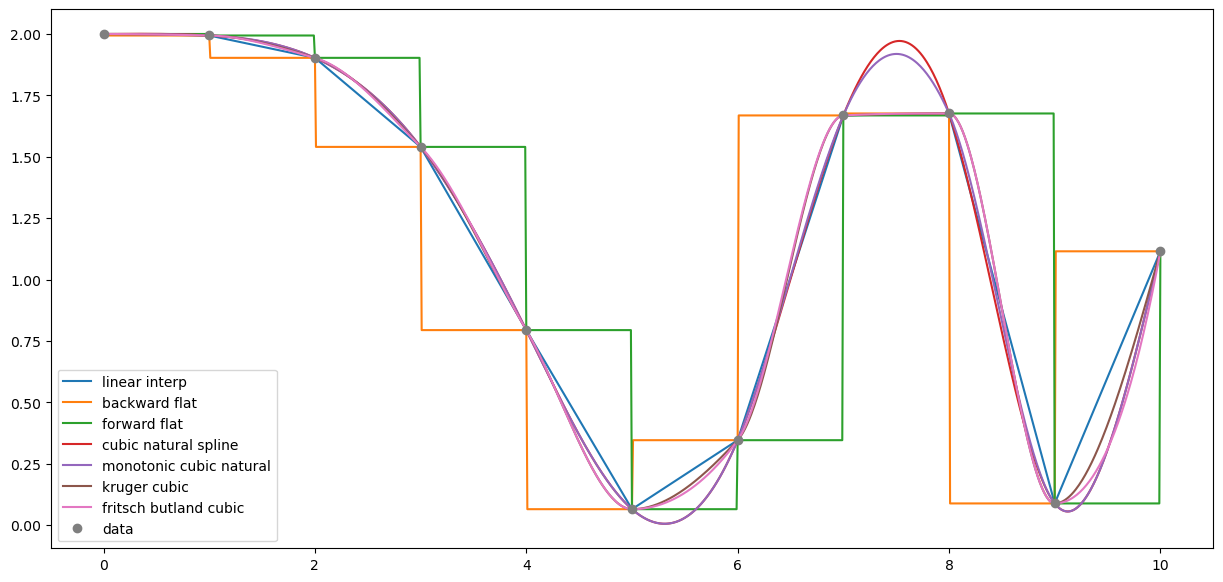

In [7]:
interp1 = ql.BackwardFlatInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_1 = np.asarray([interp1(x) for x in xnew])
interp2 = ql.ForwardFlatInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_2 = np.asarray([interp2(x) for x in xnew])
interp3 = ql.CubicNaturalSpline(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_3 = np.asarray([interp3(x) for x in xnew])
interp4 = ql.MonotonicCubicNaturalSpline(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_4 = np.asarray([interp4(x) for x in xnew])
interp5 = ql.KrugerCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_5 = np.asarray([interp5(x) for x in xnew])
interp6 = ql.FritschButlandCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_6 = np.asarray([interp6(x) for x in xnew])
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(xnew, ynew, '-', label='linear interp')
ax.plot(xnew, ynew_1, '-', label='backward flat')
ax.plot(xnew, ynew_2, '-', label='forward flat')
ax.plot(xnew, ynew_3, '-', label='cubic natural spline')
ax.plot(xnew, ynew_4, '-', label='monotonic cubic natural')
ax.plot(xnew, ynew_5, '-', label='kruger cubic')
ax.plot(xnew, ynew_6, '-', label='fritsch butland cubic')
ax.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

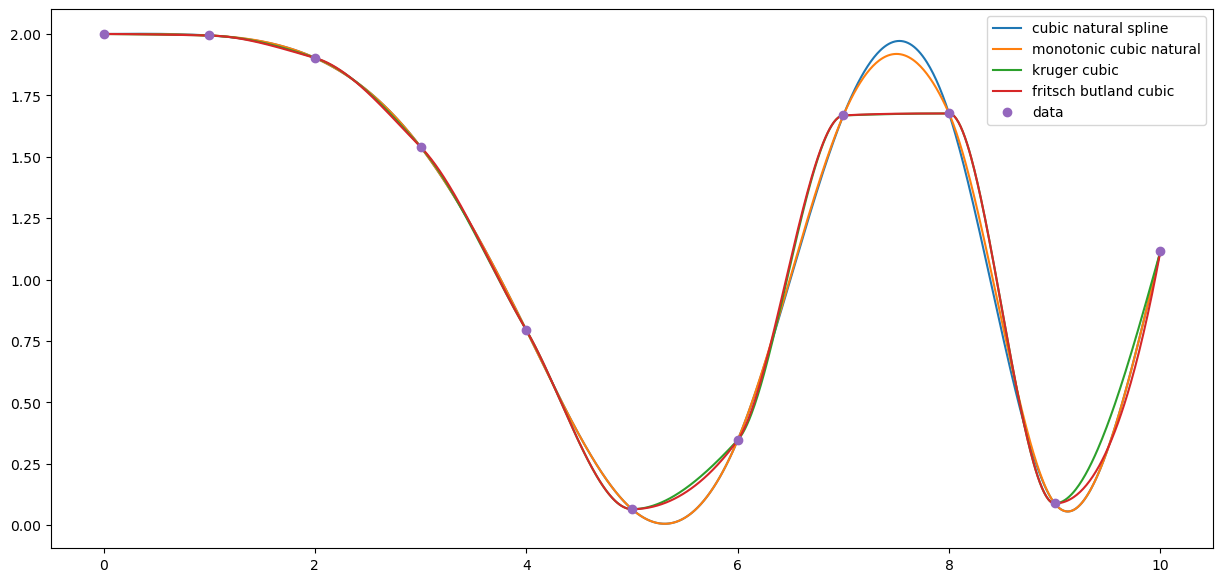

In [8]:
interp3 = ql.CubicNaturalSpline(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_3 = np.asarray([interp3(x) for x in xnew])
interp4 = ql.MonotonicCubicNaturalSpline(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_4 = np.asarray([interp4(x) for x in xnew])
interp5 = ql.KrugerCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_5 = np.asarray([interp5(x) for x in xnew])
interp6 = ql.FritschButlandCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_6 = np.asarray([interp6(x) for x in xnew])
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(xnew, ynew_3, '-', label='cubic natural spline')
ax.plot(xnew, ynew_4, '-', label='monotonic cubic natural')
ax.plot(xnew, ynew_5, '-', label='kruger cubic')
ax.plot(xnew, ynew_6, '-', label='fritsch butland cubic')
ax.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

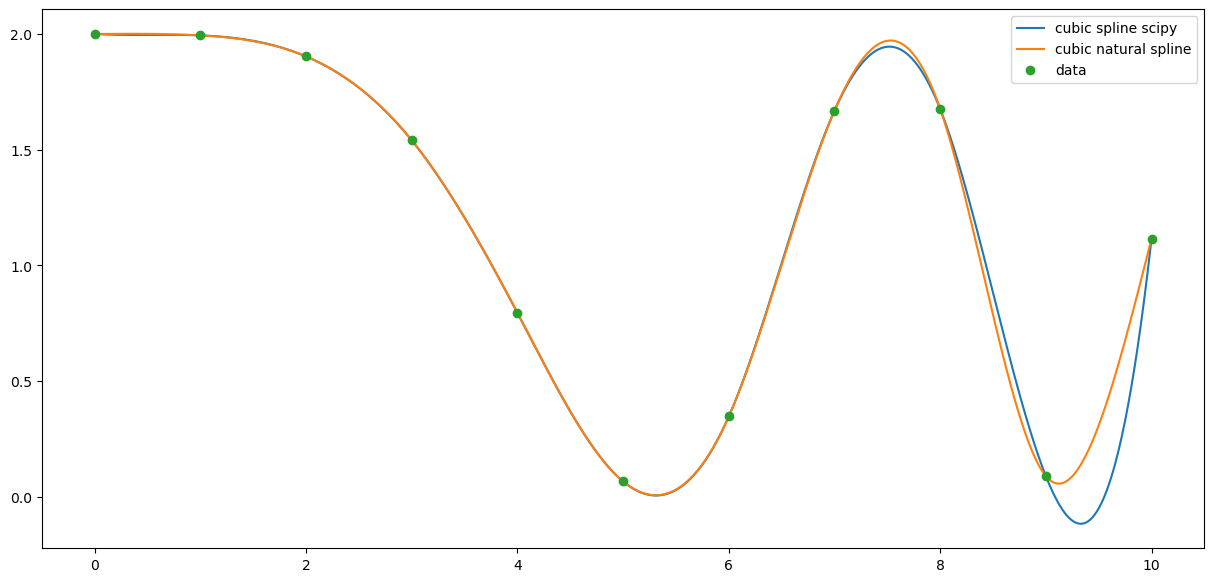

In [13]:
interp6 = ql.FritschButlandCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_6 = np.asarray([interp6(x) for x in xnew])
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(xnew, spl(xnew), '-', label='cubic spline scipy')
ax.plot(xnew, ynew_3, '-', label='cubic natural spline')
#ax.plot(xnew, ynew_4, '-', label='monotonic cubic natural')
# ax.plot(xnew, ynew_5, '-', label='kruger cubic')
# ax.plot(xnew, ynew_6, '-', label='fritsch butland cubic')
ax.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

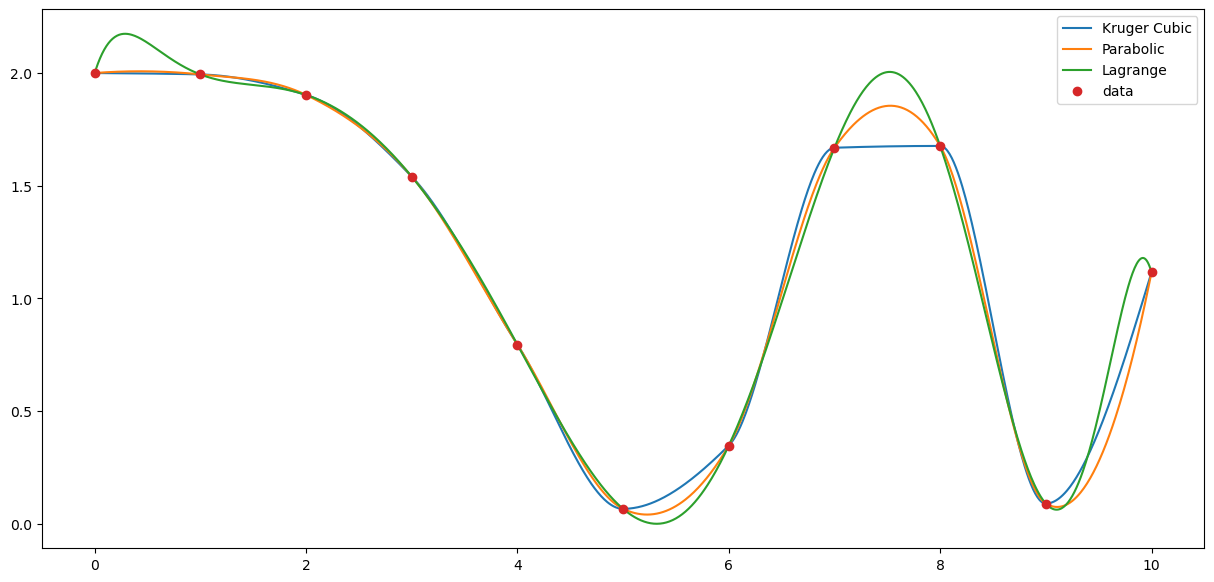

In [14]:
interp8 = ql.KrugerCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_8 = np.asarray([interp8(x) for x in xnew])
interp9 = ql.Parabolic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_9 = np.asarray([interp9(x) for x in xnew])
interp10 = ql.LagrangeInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_10 = np.asarray([interp10(x) for x in xnew])
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(xnew, ynew_8, '-', label='Kruger Cubic')
ax.plot(xnew, ynew_9, '-', label='Parabolic')
ax.plot(xnew, ynew_10, '-', label='Lagrange')
ax.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

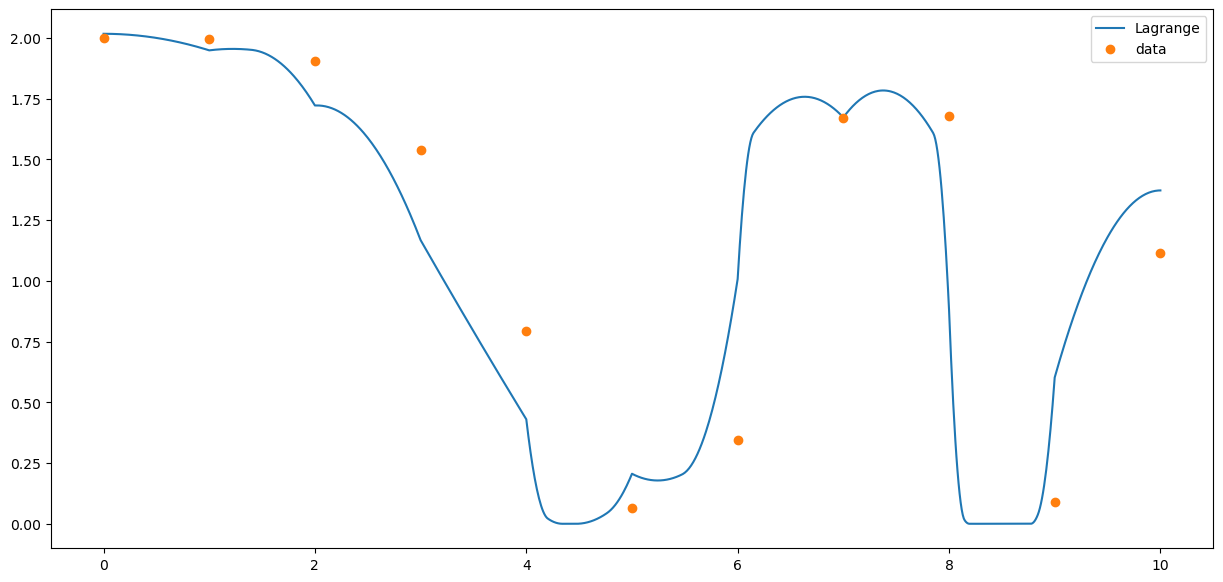

In [18]:
# ql.ChebyshevInterpolation()
interp11 = ql.ConvexMonotoneInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()), quadraticity=0.3, monotonicity=0.7, forcePositive=True)
ynew_11 = np.asarray([interp11(x) for x in xnew])
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
# ax.plot(xnew, ynew_8, '-', label='Kruger Cubic')
# ax.plot(xnew, ynew_9, '-', label='Parabolic')
ax.plot(xnew, ynew_11, '-', label='Lagrange')
ax.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()
